# **HEALTH INSURANCE RECOMMENDER SYSTEM**

# **1. Business Understanding**

## **Introduction**  
Health insurance plays a crucial role in ensuring individuals can access quality healthcare when needed. Choosing the right insurance policy is not just a financial decision—it can be a matter of life and death. With numerous options available, selecting a policy that aligns with one's needs, preferences, and financial capacity is critical. A well-matched insurance plan can provide peace of mind and financial security, while a poor choice can lead to unnecessary expenses and coverage gaps.  

## **Problem Statement**  
Selecting the right health insurance policy is often a daunting task. The vast number of available plans, combined with varying coverage options and benefits, makes decision-making complex and overwhelming. Many individuals struggle to navigate these choices, leading to suboptimal coverage that may not fully meet their healthcare needs.  

By leveraging AI and data science, we can develop a recommender system that helps individuals identify the most suitable insurance plan based on their health conditions, financial situation, and personal preferences. This system will simplify the decision-making process, ensuring clients receive the best value for their money while avoiding common pitfalls associated with selecting insurance policies.  

## **Key Stakeholders**  
- **Insurance Companies**  
  - Enhance customer experience by recommending policies that best fit clients' needs, improving efficiency and increasing approval rates.  
- **Working-Class Individuals**  
  - Gain access to insurance plans tailored to their health conditions and financial status, reducing the risk of selecting unsuitable policies.  
- **Healthcare Organizations (Hospitals, Health Ministries, etc.)**  
  - Provide informed guidance to patients, improving public health outcomes through better insurance coverage.  


# **2. Data Understanding**

## **Data Source**  
The dataset used for this project is a **synthetically generated health insurance dataset**, created using ChatGPT. It simulates real-world health insurance data, capturing key attributes relevant to policy recommendations. While synthetic, the dataset is designed to reflect realistic distributions and relationships found in actual insurance data.  

## **Data Characteristics**  
- **Number of Instances:** 52,500 records  
- **Number of Features:** 42 attributes  
- **Data Types:** A mix of categorical and numerical variables  
- **Missing Values:** Present in some key attributes, requiring appropriate imputation strategies  

## **Key Features**  
The dataset contains various features related to individuals seeking health insurance, including:  
- **Demographics**: Age, employment status, number of dependents, region  
- **Health Factors**: Pre-existing conditions, chronic illness coverage, medication coverage, maternity coverage  
- **Financial Data**: Monthly income, current health expenditure, previous insurance coverage  
- **Insurance Preferences**: Preferred coverage type, hospital preference, emergency coverage, dental and vision coverage  
- **Policy Details**: Insurance provider, waiting period, policy expiry date, duplicate plan cost  
- **User Experience**: User satisfaction rating, recommended plan  

## **Data Limitations**  
- **Synthetic Nature:** Since the dataset is artificially generated, it may not capture all the nuances of real-world insurance data. Some relationships may be oversimplified or lack real-world complexity.  
- **Potential Biases:** The dataset might inherit biases from the generation process, which could affect model generalizability.  
- **Missing Values:** Certain key features contain missing data, requiring thoughtful handling to maintain data integrity.  

## **Potential Challenges**  
- **Data Imbalance:** Some categories may be underrepresented, impacting model predictions.  
- **Feature Engineering:** Creating meaningful features from categorical and numerical attributes to improve predictive performance.  
- **Handling Missing Data:** Developing a robust imputation strategy to address gaps without introducing bias.  
- **Ethical Considerations:** Ensuring fairness in predictions, particularly when dealing with sensitive attributes like income and health conditions.  


# 3.Data Preparation

## Data Inspection


In [55]:
# import pandas

import pandas as pd
# Read csv
df= pd.read_csv('../health_insurance_recommender.csv')

In [56]:
df.shape

(52500, 42)

- The dataset is quite large, It has `52500` rows, `42` columns

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          49859 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               49864 non-null  float64
 7   pre_existing_conditions      43941 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

In [58]:
# info csv
df.isna().sum()

user_id                           0
age                            2641
gender                            0
country                           0
region                            0
employment_status                 0
monthly_income                 2636
pre_existing_conditions        8559
number_of_dependents              0
current_health_expenditure        0
hospital_preference               0
previous_insurance_coverage       0
preferred_coverage_type           0
insurance_provider                0
plan_cost                         0
deductible_amount                 0
out_of_pocket_max                 0
medication_coverage               0
maternity_coverage                0
chronic_illness_coverage          0
emergency_coverage                0
dental_coverage                   0
vision_coverage                   0
user_satisfaction_rating       2619
recommended_plan                  0
policy_expiry_date                0
duplicate_plan_cost               0
duplicate_country           

- Some columns , have some missing values.This will be handled in data cleaning phase

## Data Description

Below is the description of the target and featues from the documentation


| #  | Feature                        | Definition  |
|----|--------------------------------|----------------------------------------------------------|
| 1  | user_id                        | Unique identifier for each user  |
| 2  | age                             | Age of the user  |
| 3  | gender                          | Gender of the user (Male, Female, Other)  |
| 4  | country                         | Country of residence  |
| 5  | monthly_income                  | User's monthly income in USD  |
| 6  | health_condition                | Primary health condition of the user (e.g., Diabetes, Hypertension, Asthma)  |
| 7  | plan_cost                       | Monthly cost of the insurance plan in USD  |
| 8  | deductible_amount               | Amount user pays before insurance covers expenses  |
| 9  | out_of_pocket_max               | Maximum amount user pays per year before full coverage  |
| 10 | family_size                     | Number of dependents in the family  |
| 11 | marital_status                  | User's marital status (Single, Married, Divorced, Widowed)  |
| 12 | employment_type                 | User's employment type (Salaried, Self-employed, Unemployed)  |
| 13 | education_level                 | Highest level of education attained by the user  |
| 14 | recent_hospital_visits          | Number of hospital visits in the past year  |
| 15 | smoking_habit                   | Whether the user smokes (Yes, No)  |
| 16 | alcohol_consumption             | Whether the user consumes alcohol (Yes, No)  |
| 17 | existing_medications            | Whether the user is on long-term medication (Yes, No)  |
| 18 | disability_status               | Whether the user has a disability (Yes, No)  |
| 19 | co_payment_preference           | User's preference for co-payment level (Low, Medium, High)  |
| 20 | lifetime_coverage_limit         | Maximum lifetime coverage amount in USD  |
| 21 | claim_reimbursement_speed       | Speed of claim reimbursement (Fast, Medium, Slow)  |
| 22 | insurance_effective_time        | Time taken for the insurance plan to start being effective (in days)  |
| 23 | target_plan                     | Recommended insurance plan based on user profile  |


## Features Missing Descriptions  

The following features are present in the dataset but are not yet described:  

- **`region`**  
- **`employment_status`**  
- **`pre_existing_conditions`**  
- **`number_of_dependents`**  
- **`current_health_expenditure`**  
- **`hospital_preference`**  
- **`previous_insurance_coverage`**  
- **`preferred_coverage_type`**  
- **`insurance_provider`**  
- **`medication_coverage`**  
- **`maternity_coverage`**  
- **`chronic_illness_coverage`**  
- **`emergency_coverage`**  
- **`dental_coverage`**  
- **`vision_coverage`**  
- **`user_satisfaction_rating`**  
- **`recommended_plan`**  
- **`policy_expiry_date`**  
- **`duplicate_plan_cost`**  
- **`duplicate_country`**  
- **`waiting_period_months`**  
- **`preferred_hospital`**  



## Data Cleaning

### Checking for duplicates and missing values

In [59]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Display columns with missing values
print("\nNumber of missing values in each column:")
for column in df.columns:
    missing_values = df[column].isnull().sum()
    if missing_values > 1:
        print(f"{column}: {missing_values}")

Number of duplicate rows: 0

Number of missing values in each column:
age: 2641
monthly_income: 2636
pre_existing_conditions: 8559
user_satisfaction_rating: 2619


- There are no duplicated rows. However, 3 columns have missing data. Before imputing/ deleting missing rows lets plot their distribution


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualizing numerical columns:


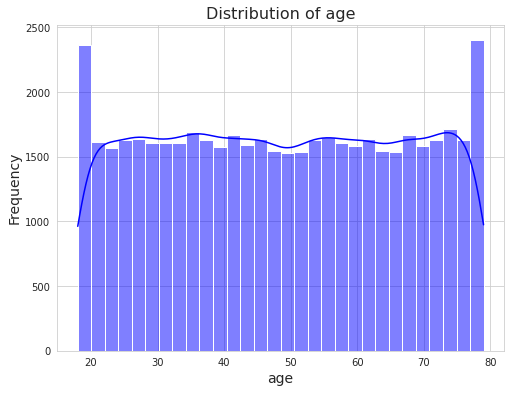

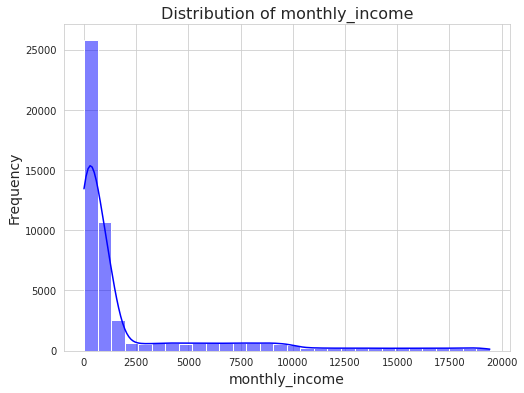

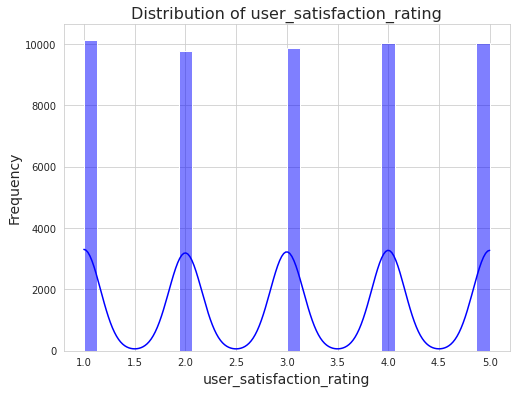

In [61]:
# Plot numerical columns
print("Visualizing numerical columns:")
for column in df[['age','monthly_income','user_satisfaction_rating']].columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

### **Handling Missing Values: Imputation Strategy**
To ensure data integrity and reduce bias, we have chosen appropriate imputation strategies based on the distribution of each variable.

#### **1. Age (Median Imputation)**
- The distribution of age appears nearly uniform with slight variations.
- Using the **median** is appropriate because:
  - It is robust to outliers.
  - It represents the central tendency of the data without being influenced by extreme values.
  - It maintains the overall structure of the distribution.

#### **2. Monthly Income (Median Imputation)**
- Monthly income is **highly right-skewed**, meaning there are a few extremely high values.
- Using the **median** is preferred because:
  - The mean would be affected by high-income outliers, leading to overestimation.
  - The median provides a more reliable central measure for skewed distributions.
  - It better represents the typical income level without distortion from extreme values.

#### **3. User Satisfaction Rating (Mode Imputation)**
- This variable is **ordinal/categorical**, typically on a scale (e.g., 1-5).
- Using the **mode** is ideal because:
  - It preserves the most common response, maintaining data consistency.
  - It avoids artificially shifting the average rating.
  - It ensures that imputed values align with actual user ratings.

By applying these imputation methods, we maintain the dataset's integrity while minimizing distortion.


In [62]:
# Impute missing values
df['age']= df['age'].fillna(df['age'].median())
df['monthly_income']= df['monthly_income'].fillna(df['monthly_income'].median())
df['user_satisfaction_rating']= df['user_satisfaction_rating'].fillna(df['user_satisfaction_rating'].mode()[0])

In [63]:
# confirm imputation
df.isna().sum()

user_id                           0
age                               0
gender                            0
country                           0
region                            0
employment_status                 0
monthly_income                    0
pre_existing_conditions        8559
number_of_dependents              0
current_health_expenditure        0
hospital_preference               0
previous_insurance_coverage       0
preferred_coverage_type           0
insurance_provider                0
plan_cost                         0
deductible_amount                 0
out_of_pocket_max                 0
medication_coverage               0
maternity_coverage                0
chronic_illness_coverage          0
emergency_coverage                0
dental_coverage                   0
vision_coverage                   0
user_satisfaction_rating          0
recommended_plan                  0
policy_expiry_date                0
duplicate_plan_cost               0
duplicate_country           

- There are no longer missing values

### Handling Duplicate columns
-Function below drops duplicate columns

In [64]:
def remove_duplicate_columns_by_values(df):
    """
    Removes duplicate columns in a DataFrame based on identical values.
    Prints the names of removed columns while preserving original data types.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
    
    Returns:
        pd.DataFrame: A DataFrame with duplicate columns removed.
    """
    original_dtypes = df.dtypes  # Store original data types
    
    df_T = df.T.drop_duplicates().T  # Transpose, drop duplicate columns, then transpose back
    
    duplicate_cols = [col for col in df.columns if col not in df_T.columns]

    if duplicate_cols:
        print("Removed duplicate columns based on identical values:", duplicate_cols)

    # Restore original data types
    for col in df_T.columns:
        df_T[col] = df_T[col].astype(original_dtypes[col])

    return df_T


In [65]:
df = remove_duplicate_columns_by_values(df)

Removed duplicate columns based on identical values: ['duplicate_country']


- Duplicate rows and columns have been dropped


## EDA (Exploratory Data Analysis)


In [66]:
df.shape

(52500, 41)

- After removing duplicate column, there are now 41 columns

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          52500 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               52500 non-null  float64
 7   pre_existing_conditions      43941 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

- Rearranging target to feature as last columns

In [68]:
columns = list(df.columns)
columns.remove('recommended_plan')
columns.append('recommended_plan')
df = df[columns]
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          52500 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               52500 non-null  float64
 7   pre_existing_conditions      43941 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

- The features are mixed datatypes, Some are categorical while others are numerical

### Univariate Analysis

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

def univariate_analysis(df):
    """
    Perform univariate analysis on a DataFrame.
    
    - Categorical columns (≤ 5 unique values): Pie chart
    - Categorical columns (> 5 unique values): Bar chart
    - Numerical columns: Histogram with KDE
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
    
    Returns:
        None (Displays plots)
    """
    sns.set_style("whitegrid")  # Clean professional grid style
    colors = sns.color_palette("muted")  

    for col in df.columns:
        plt.figure(figsize=(8, 5))

        if df[col].dtype == 'object' or df[col].nunique() < 15:  # Treat as categorical
            value_counts = df[col].value_counts()
            num_categories = len(value_counts)

            if num_categories <= 5:  # Pie chart for small categories
                plt.pie(
                    value_counts, labels=value_counts.index, autopct='%1.1f%%',
                    colors=colors[:num_categories], startangle=140, wedgeprops={'edgecolor': 'black'}
                )
                plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')

            else:  # Bar Chart for Large Categories
                ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, edgecolor='black')
                plt.xticks(rotation=45, ha='right')
                plt.ylabel("Count", fontsize=12)
                plt.title(f"Frequency of {col}", fontsize=14, fontweight='bold')

                # Add count labels on top of bars
                for p in ax.patches:
                    ax.annotate(f'{int(p.get_height())}', 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha='center', va='bottom', fontsize=10, fontweight='bold')

                # Grid for better readability
                ax.yaxis.grid(True, linestyle='--', alpha=0.7)

        else:  # Numerical column
            sns.histplot(df[col], bins=30, kde=True, color=colors[0], edgecolor='black')
            plt.axvline(df[col].median(), color='red', linestyle='dashed', label='Median')
            plt.axvline(df[col].mean(), color='blue', linestyle='dashed', label='Mean')
            plt.legend()
            plt.xlabel(col, fontsize=12)
            plt.ylabel("Density", fontsize=12)
            plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')

        plt.show()


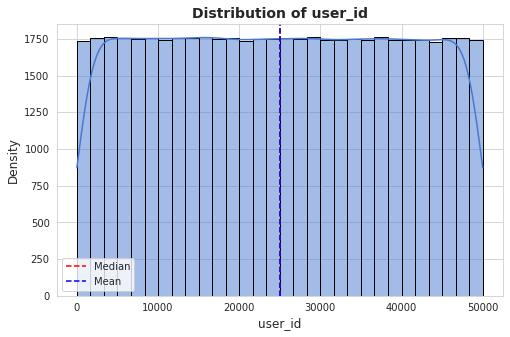

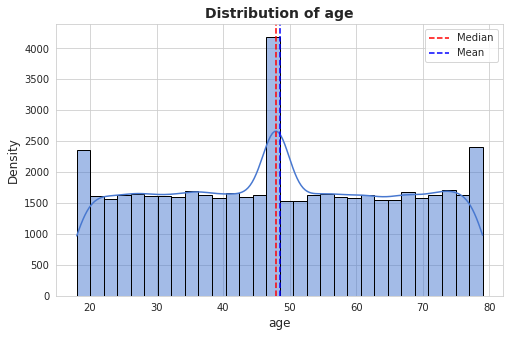

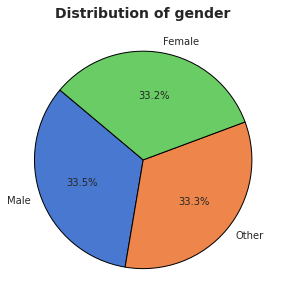

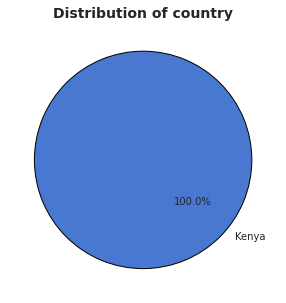

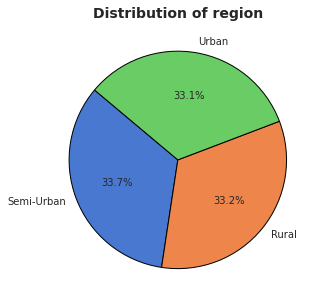

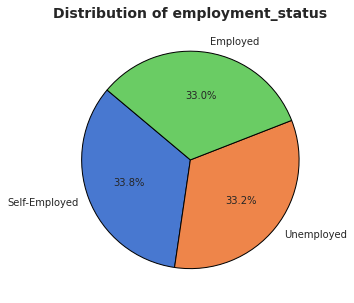

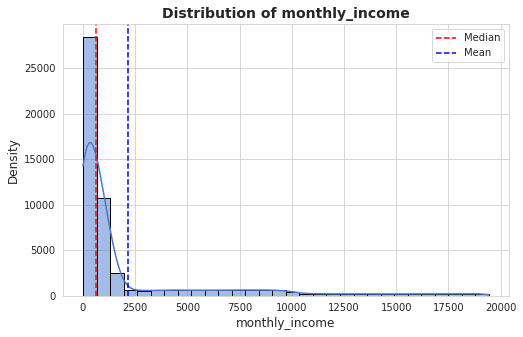

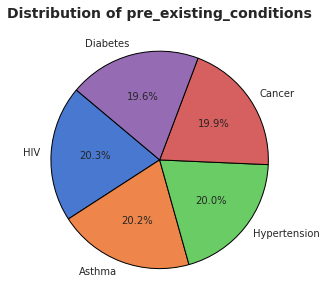

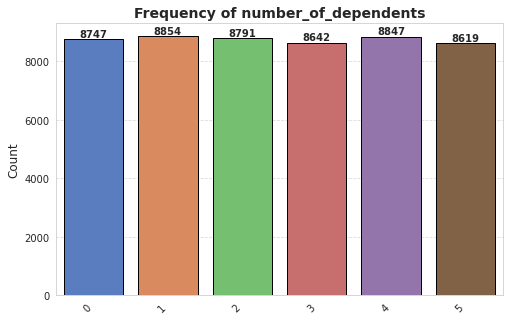

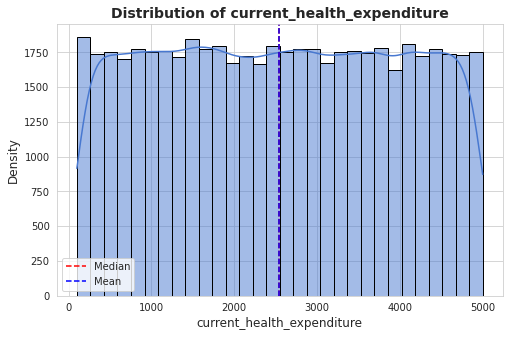

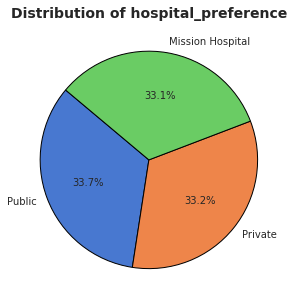

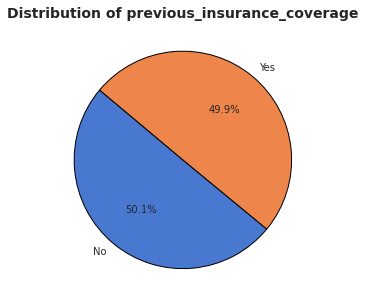

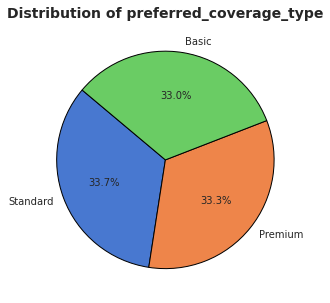

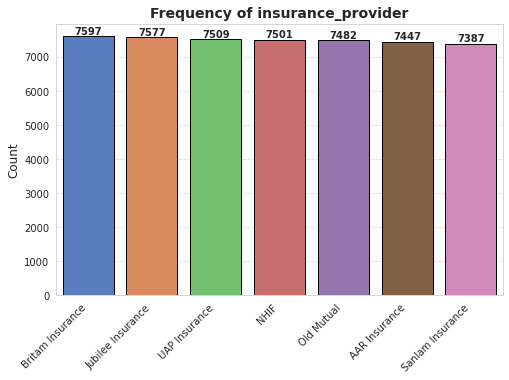

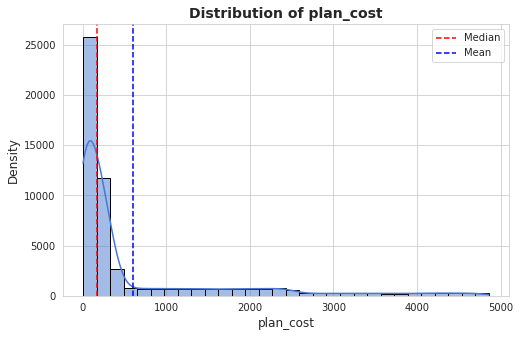

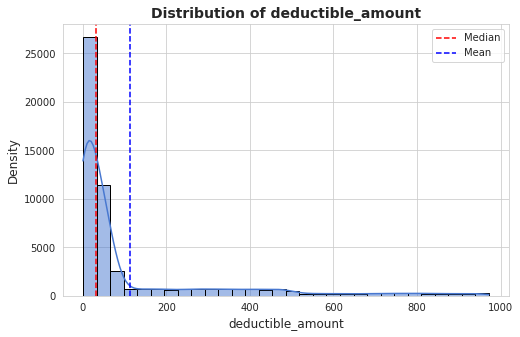

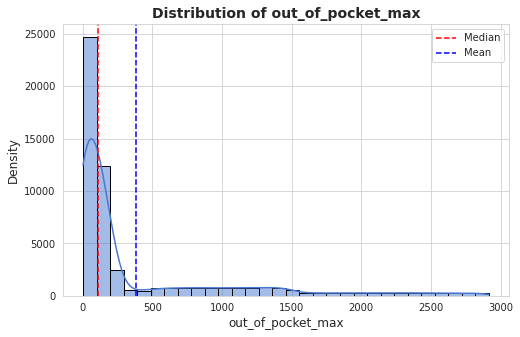

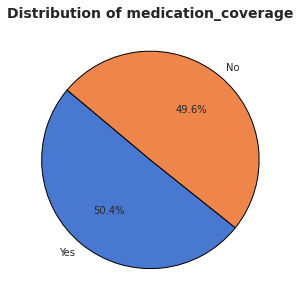

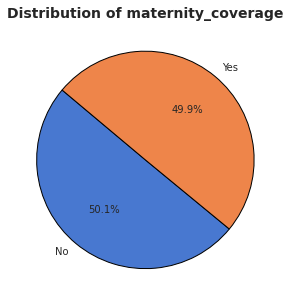

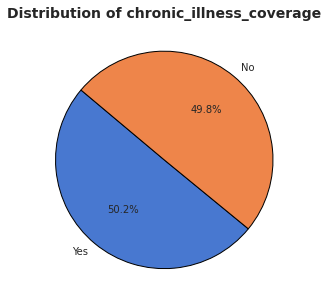

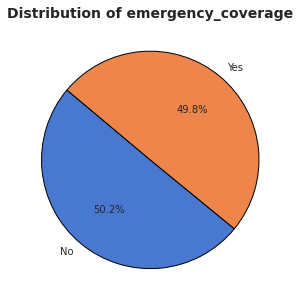

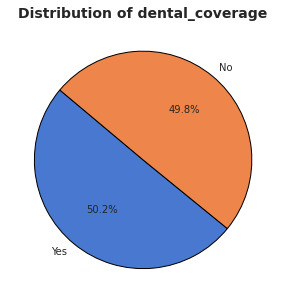

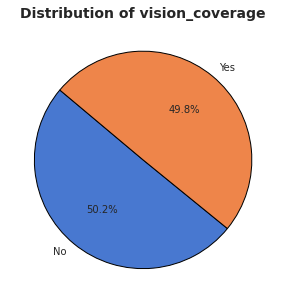

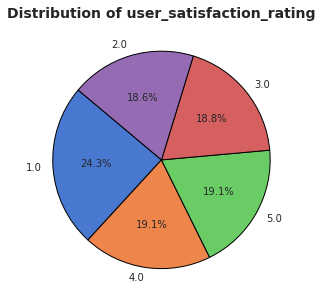

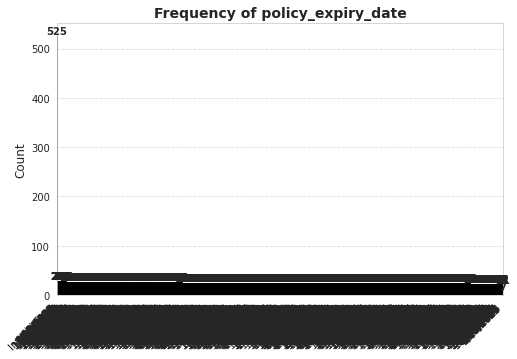

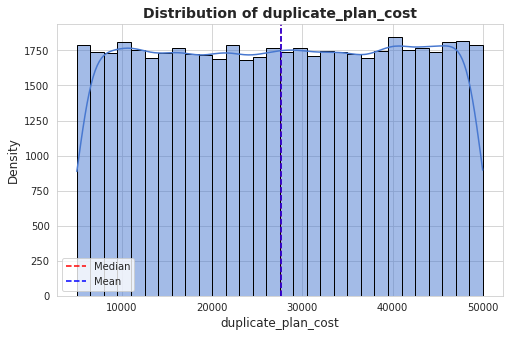

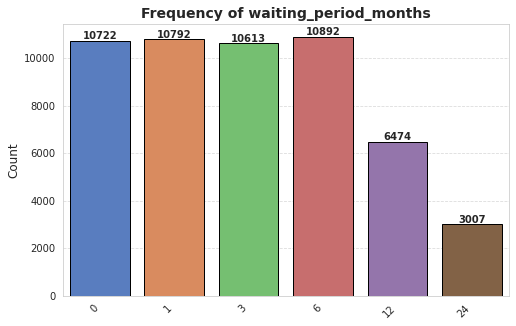

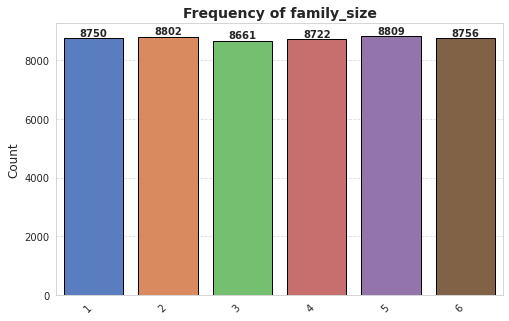

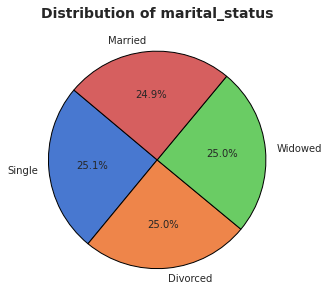

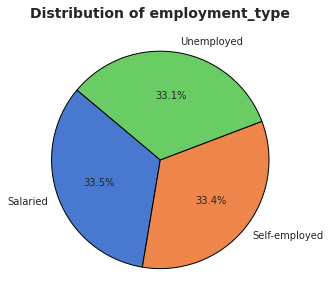

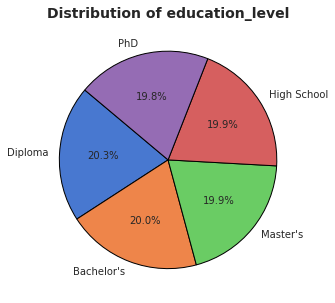

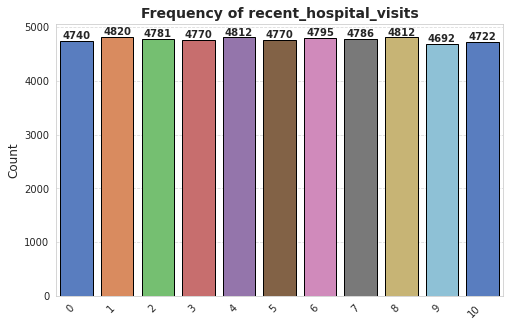

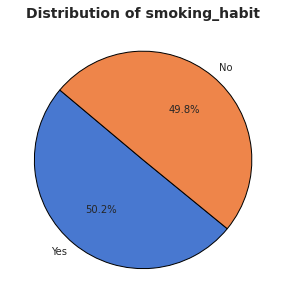

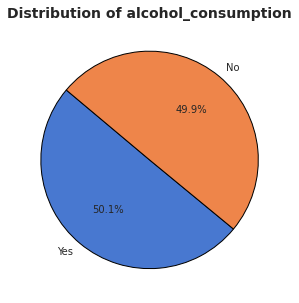

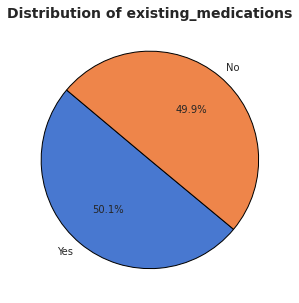

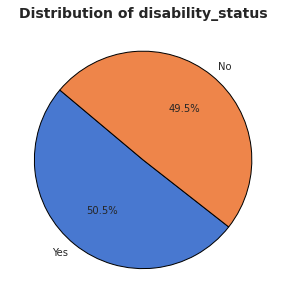

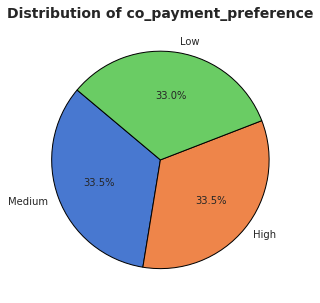

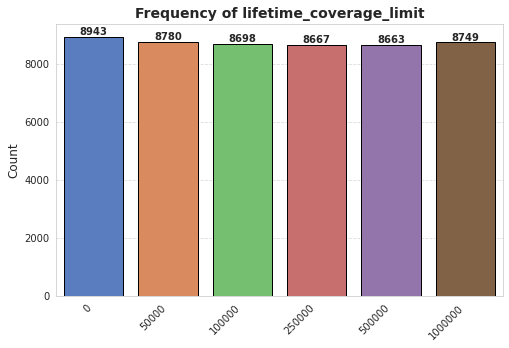

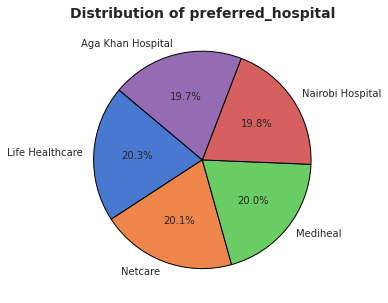

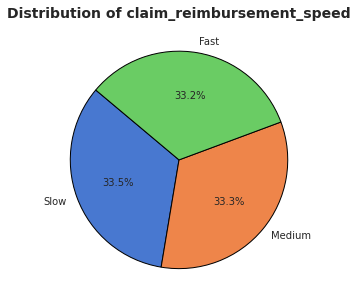

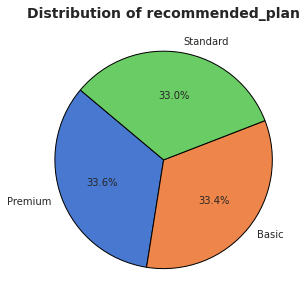

In [70]:
univariate_analysis(df)

### **Univariate Analysis Summary**

#### **Numerical Features**
The distribution of numerical variables, particularly those related to income or money spent, exhibits significant right skewness. This indicates that a majority of individuals fall within a lower income range, with fewer individuals earning significantly higher amounts. Examples of such features include ***`plan_cost`, `monthly_income`, `deductible_amount`***.

The age distribution presents an anomaly, with noticeable spikes around the mean and the edges. This suggests possible data irregularities, such as an imputed or default value being assigned frequently, errors in data entry, or a common age group dominating the dataset. This needs further investigation to determine whether it impacts analysis and modeling.

#### **Categorical Features**
Most categorical variables are well-balanced, suggesting that no single category dominates the dataset. This is beneficial for modeling, as it reduces the risk of biased predictions. Some of the key balanced categorical variables include ***`marital_status`, `preferred_hospital`, `education_level`***.

#### **Conclusion**
Overall, the dataset presents a mix of skewed numerical distributions and well-distributed categorical variables. The anomaly in the age distribution warrants further examination to ensure data integrity, and potential transformations may be needed for skewed numerical variables.



In [71]:
df.columns

Index(['user_id', 'age', 'gender', 'country', 'region', 'employment_status',
       'monthly_income', 'pre_existing_conditions', 'number_of_dependents',
       'current_health_expenditure', 'hospital_preference',
       'previous_insurance_coverage', 'preferred_coverage_type',
       'insurance_provider', 'plan_cost', 'deductible_amount',
       'out_of_pocket_max', 'medication_coverage', 'maternity_coverage',
       'chronic_illness_coverage', 'emergency_coverage', 'dental_coverage',
       'vision_coverage', 'user_satisfaction_rating', 'policy_expiry_date',
       'duplicate_plan_cost', 'waiting_period_months', 'family_size',
       'marital_status', 'employment_type', 'education_level',
       'recent_hospital_visits', 'smoking_habit', 'alcohol_consumption',
       'existing_medications', 'disability_status', 'co_payment_preference',
       'lifetime_coverage_limit', 'preferred_hospital',
       'claim_reimbursement_speed', 'recommended_plan'],
      dtype='object')

### Bivariate Analysis
***to be done...***
---


### Data Preprocessing

#### Removing Unnecessary Columns

- The columns ***`user_id`, `country`, `policy_expiry_date`*** are unnecessary since they contain extraneous info
- For the columns ***`plan_cost` and`duplicate_plan_cost`*** we shall have to investigate further

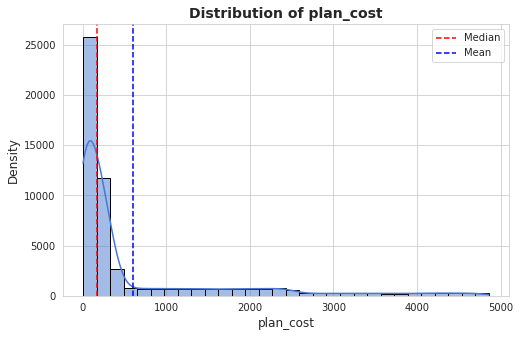

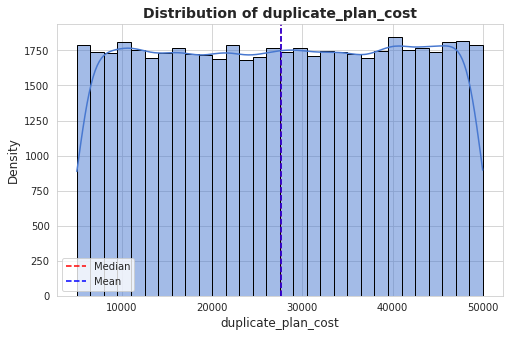

In [72]:
univariate_analysis(df[['plan_cost','duplicate_plan_cost']])

- It can be seen that they are very different. `plan_cost` has a right-skewed distribution, while `duplicate_plan_cost` has a uniform distribution. 

- Since the distribution of `plan_cost` shows the same trend as those of `monthly_income` and `out_of_pocket_max`, we shall use it and drop `duplicate_plan_cost`.  


In [73]:
df = df.drop (columns=['duplicate_plan_cost','user_id', 'country', 'policy_expiry_date'], axis =1)
df.shape

(52500, 37)

### Encoding  

For categorical variables, we will use different encoding techniques based on their nature:  

- **Hierarchical Categories:**  
  Some features, such as `region`, `recommended_plan` (insert relevant column here), have an inherent order. For these, we will use **ordinal encoding** to preserve the hierarchy. This ensures that the encoding reflects the logical progression of the categories (e.g., `Basic < Standard < Premium`).  

- **Non-Hierarchical Categories:**  
  For categorical variables without a meaningful order, we will use **one-hot encoding (OHE)** to avoid introducing unintended ordinal relationships. This method ensures that all categories are treated equally without implying ranking.  

- **Binary Categories (Yes/No):**  
  Some features, such as `...` (insert relevant columns), have only two possible values (e.g., **Yes/No**, **True/False**). These will be converted into binary format (`0` and `1`) for simplicity.  

By applying the appropriate encoding techniques, we ensure that categorical data is properly represented for modeling.  


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          52500 non-null  float64
 1   gender                       52500 non-null  object 
 2   region                       52500 non-null  object 
 3   employment_status            52500 non-null  object 
 4   monthly_income               52500 non-null  float64
 5   pre_existing_conditions      43941 non-null  object 
 6   number_of_dependents         52500 non-null  int64  
 7   current_health_expenditure   52500 non-null  float64
 8   hospital_preference          52500 non-null  object 
 9   previous_insurance_coverage  52500 non-null  object 
 10  preferred_coverage_type      52500 non-null  object 
 11  insurance_provider           52500 non-null  object 
 12  plan_cost                    52500 non-null  float64
 13  deductible_amoun

- Splitting numerical and categorical columns for encoding

In [75]:
df_categorical = df.select_dtypes(include=['object', 'category'])
df_numerical = df.select_dtypes(include=['int64','float64'])
df_categorical.shape, df_numerical.shape

((52500, 25), (52500, 12))

#### Encoding Binary Categories

In [76]:
# Extract binary categories

bin_categories = []
for column in list(df_categorical.columns):
    if len(df_categorical[column].value_counts())== 2:
        bin_categories.append(column)

# Confirm if options are 'Yes' and 'No'
for column in bin_categories:
    print (df_categorical[column].value_counts())


No     26321
Yes    26179
Name: previous_insurance_coverage, dtype: int64
Yes    26451
No     26049
Name: medication_coverage, dtype: int64
No     26327
Yes    26173
Name: maternity_coverage, dtype: int64
Yes    26345
No     26155
Name: chronic_illness_coverage, dtype: int64
No     26351
Yes    26149
Name: emergency_coverage, dtype: int64
Yes    26369
No     26131
Name: dental_coverage, dtype: int64
No     26374
Yes    26126
Name: vision_coverage, dtype: int64
Yes    26358
No     26142
Name: smoking_habit, dtype: int64
Yes    26325
No     26175
Name: alcohol_consumption, dtype: int64
Yes    26299
No     26201
Name: existing_medications, dtype: int64
Yes    26534
No     25966
Name: disability_status, dtype: int64


- Binary encoding...

In [77]:
for col in bin_categories:
    df_categorical[col] = df[col].map({'Yes': 1, 'No': 0})  

<ipython-input-77-88cdd5da22b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[col] = df[col].map({'Yes': 1, 'No': 0})


In [78]:
df_categorical.head()

,gender,region,employment_status,pre_existing_conditions,hospital_preference,previous_insurance_coverage,preferred_coverage_type,insurance_provider,medication_coverage,maternity_coverage,...,employment_type,education_level,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,preferred_hospital,claim_reimbursement_speed,recommended_plan
0,Female,Urban,Self-Employed,Cancer,Private,1,Standard,Britam Insurance,1,1,...,Unemployed,Bachelor's,0,1,0,1,High,Life Healthcare,Medium,Premium
1,Male,Semi-Urban,Unemployed,NaN,Public,0,Standard,NHIF,1,1,...,Salaried,Master's,1,1,0,1,High,Netcare,Slow,Basic
2,Male,Urban,Unemployed,NaN,Mission Hospital,0,Standard,NHIF,1,0,...,Self-employed,Diploma,0,1,1,1,High,Netcare,Fast,Premium
3,Male,Rural,Employed,Cancer,Public,1,Basic,Jubilee Insurance,0,1,...,Self-employed,Diploma,0,1,0,0,High,Netcare,Medium,Standard
4,Male,Urban,Employed,Asthma,Private,1,Basic,Sanlam Insurance,0,1,...,Unemployed,Bachelor's,0,1,0,1,High,Aga Khan Hospital,Fast,Standard


#### Encoding Hierarchical Categories

In [79]:
# columns less bin_categories
for col in list(df_categorical.columns):
    if col not in bin_categories:
        print (col)

gender
region
employment_status
pre_existing_conditions
hospital_preference
preferred_coverage_type
insurance_provider
marital_status
employment_type
education_level
co_payment_preference
preferred_hospital
claim_reimbursement_speed
recommended_plan


In [80]:

ordinal_categories = ['recommended_plan','claim_reimbursement_speed','education_level','region']
for col in list(ordinal_categories):
    print (df_categorical[col].value_counts())

Premium     17642
Basic       17528
Standard    17330
Name: recommended_plan, dtype: int64
Slow      17579
Medium    17479
Fast      17442
Name: claim_reimbursement_speed, dtype: int64
Diploma        10642
Bachelor's     10516
Master's       10464
High School    10462
PhD            10416
Name: education_level, dtype: int64
Semi-Urban    17704
Rural         17416
Urban         17380
Name: region, dtype: int64


- ordinal encoding...

In [81]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for hierarchical categories
ordinal_mappings = {
    'recommended_plan': ['Basic', 'Standard', 'Premium'],
    'claim_reimbursement_speed': ['Slow', 'Medium', 'Fast'],
    'education_level': ['High School', 'Diploma', "Bachelor's", "Master's", 'PhD'],
    'region': ['Rural', 'Semi-Urban', 'Urban']
}

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_categories])

df_categorical[ordinal_categories] = ordinal_encoder.fit_transform(df_categorical[ordinal_categories])

# Convert to integer type
df_categorical[ordinal_categories] = df_categorical[ordinal_categories].astype(int)

# Display transformed data
df_categorical.head()


<ipython-input-81-662df7a20bca>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[ordinal_categories] = ordinal_encoder.fit_transform(df_categorical[ordinal_categories])
/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,gender,region,employment_status,pre_existing_conditions,hospital_preference,previous_insurance_coverage,preferred_coverage_type,insurance_provider,medication_coverage,maternity_coverage,...,employment_type,education_level,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,preferred_hospital,claim_reimbursement_speed,recommended_plan
0,Female,2,Self-Employed,Cancer,Private,1,Standard,Britam Insurance,1,1,...,Unemployed,2,0,1,0,1,High,Life Healthcare,1,2
1,Male,1,Unemployed,NaN,Public,0,Standard,NHIF,1,1,...,Salaried,3,1,1,0,1,High,Netcare,0,0
2,Male,2,Unemployed,NaN,Mission Hospital,0,Standard,NHIF,1,0,...,Self-employed,1,0,1,1,1,High,Netcare,2,2
3,Male,0,Employed,Cancer,Public,1,Basic,Jubilee Insurance,0,1,...,Self-employed,1,0,1,0,0,High,Netcare,1,1
4,Male,2,Employed,Asthma,Private,1,Basic,Sanlam Insurance,0,1,...,Unemployed,2,0,1,0,1,High,Aga Khan Hospital,2,1


In [82]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       52500 non-null  object
 1   region                       52500 non-null  int64 
 2   employment_status            52500 non-null  object
 3   pre_existing_conditions      43941 non-null  object
 4   hospital_preference          52500 non-null  object
 5   previous_insurance_coverage  52500 non-null  int64 
 6   preferred_coverage_type      52500 non-null  object
 7   insurance_provider           52500 non-null  object
 8   medication_coverage          52500 non-null  int64 
 9   maternity_coverage           52500 non-null  int64 
 10  chronic_illness_coverage     52500 non-null  int64 
 11  emergency_coverage           52500 non-null  int64 
 12  dental_coverage              52500 non-null  int64 
 13  vision_coverage              52

#### Encoding Non-Hierarchical Categories

In [83]:
#Extract columns
ohe_categories= list((df_categorical.select_dtypes(include='object')).columns)

In [84]:
ohe_categories

['gender',
 'employment_status',
 'pre_existing_conditions',
 'hospital_preference',
 'preferred_coverage_type',
 'insurance_provider',
 'marital_status',
 'employment_type',
 'co_payment_preference',
 'preferred_hospital']

In [85]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')  # drop first to avoid multicollinearity

# Fit and transform non-hierarchical categorical columns
ohe_transformed = ohe.fit_transform(df_categorical[ohe_categories])

# Create a DataFrame with new one-hot encoded columns
ohe_df = pd.DataFrame(ohe_transformed, columns=ohe.get_feature_names_out(ohe_categories))

# Drop original categorical columns and concatenate new OHE features
df_categorical = df_categorical.drop(columns=ohe_categories).reset_index(drop=True)
df_categorical = pd.concat([df_categorical, ohe_df], axis=1)

# Display transformed data
df_categorical.head()


,region,previous_insurance_coverage,medication_coverage,maternity_coverage,chronic_illness_coverage,emergency_coverage,dental_coverage,vision_coverage,education_level,smoking_habit,...,marital_status_Single,marital_status_Widowed,employment_type_Self-employed,employment_type_Unemployed,co_payment_preference_Low,co_payment_preference_Medium,preferred_hospital_Life Healthcare,preferred_hospital_Mediheal,preferred_hospital_Nairobi Hospital,preferred_hospital_Netcare
0,2,1,1,1,1,1,0,0,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,1,1,0,1,0,0,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0,1,0,1,1,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,1,0,1,1,0,0,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,1,0,1,0,1,0,1,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


- Verify encoding


In [86]:
len((df_categorical.select_dtypes(include = ['category','object'])).columns)== 0

True

- Encoding is verified. 
- Concatenating the full encoded dataframe

In [87]:
df_encoded = pd.concat([df_categorical,df_numerical], axis =1)
df_encoded.shape

(52500, 57)

In [88]:
df_encoded.head()

,region,previous_insurance_coverage,medication_coverage,maternity_coverage,chronic_illness_coverage,emergency_coverage,dental_coverage,vision_coverage,education_level,smoking_habit,...,number_of_dependents,current_health_expenditure,plan_cost,deductible_amount,out_of_pocket_max,user_satisfaction_rating,waiting_period_months,family_size,recent_hospital_visits,lifetime_coverage_limit
0,2,1,1,1,1,1,0,0,2,0,...,2,2614.37,282.640320,28.759968,104.129064,1.0,6,5,5,50000
1,1,0,1,1,0,1,0,0,3,1,...,1,3343.49,1.968957,0.813804,1.718194,1.0,12,2,10,1000000
2,2,0,1,0,1,1,0,0,1,0,...,5,4615.26,1491.425208,417.132072,804.036744,4.0,3,1,1,1000000
3,0,1,0,1,1,0,0,1,1,0,...,3,612.38,1334.738664,290.673432,535.564512,2.0,12,1,5,1000000
4,2,1,0,1,0,1,0,1,2,0,...,4,2314.12,5.158692,1.276281,3.653894,4.0,12,3,0,1000000


### Checking correlation with target
#### Correlation Analysis

Since our target variable `recommended_plan` is **ordinal** (0 = Basic, 1 = Standard, 2 = Premium), we use **Spearman's correlation** instead of Pearson’s. Spearman’s method measures **monotonic relationships**, making it suitable for categorical-ordinal relationships where the spacing between categories may not be uniform.

#### Reasons for Using Spearman:
- **Handles Ordinal Data**: Since `recommended_plan` follows a ranked order, Spearman’s correlation is a better fit than Pearson’s, which assumes linear relationships.
- **Captures Monotonic Trends**: If a feature's increase (or decrease) consistently influences the plan recommendation, Spearman will detect this.
- **More Robust to Non-Normality**: Unlike Pearson’s correlation, Spearman’s does not assume normally distributed data.

By analyzing the correlation between our **one-hot encoded categorical features** and the target, we can identify **main drivers behind a user's recommended plan**.


In [89]:
# Placing last column as target
columns = list(df_encoded.columns)
columns.remove('recommended_plan')
columns.append('recommended_plan')
df_encoded = df_encoded[columns]

df_encoded.head()

,region,previous_insurance_coverage,medication_coverage,maternity_coverage,chronic_illness_coverage,emergency_coverage,dental_coverage,vision_coverage,education_level,smoking_habit,...,current_health_expenditure,plan_cost,deductible_amount,out_of_pocket_max,user_satisfaction_rating,waiting_period_months,family_size,recent_hospital_visits,lifetime_coverage_limit,recommended_plan
0,2,1,1,1,1,1,0,0,2,0,...,2614.37,282.640320,28.759968,104.129064,1.0,6,5,5,50000,2
1,1,0,1,1,0,1,0,0,3,1,...,3343.49,1.968957,0.813804,1.718194,1.0,12,2,10,1000000,0
2,2,0,1,0,1,1,0,0,1,0,...,4615.26,1491.425208,417.132072,804.036744,4.0,3,1,1,1000000,2
3,0,1,0,1,1,0,0,1,1,0,...,612.38,1334.738664,290.673432,535.564512,2.0,12,1,5,1000000,1
4,2,1,0,1,0,1,0,1,2,0,...,2314.12,5.158692,1.276281,3.653894,4.0,12,3,0,1000000,1


In [90]:
# Compute Spearman correlation between OHE features and the target
correlation_matrix = df_categorical.corr(method='spearman')

# Extract correlation values with the target variable
target_col = 'recommended_plan'  # Ensure this is the encoded column
corr_with_target = correlation_matrix[target_col].drop(target_col).sort_values(ascending=False)

# Display top correlated features
print("Top positively correlated features with Recommended Plan:")
print(corr_with_target.head(25))  # Top 10 most positively correlated features

print("\nTop negatively correlated features with Recommended Plan:")
print(corr_with_target.tail(10))  # Top 10 most negatively correlated features


Top positively correlated features with Recommended Plan:
insurance_provider_Jubilee Insurance    0.009044
co_payment_preference_Low               0.007583
pre_existing_conditions_nan             0.006571
previous_insurance_coverage             0.005032
employment_type_Unemployed              0.004950
disability_status                       0.004860
marital_status_Married                  0.004174
medication_coverage                     0.003840
insurance_provider_NHIF                 0.003377
region                                  0.003350
insurance_provider_Old Mutual           0.003246
maternity_coverage                      0.003141
employment_status_Self-Employed         0.003123
chronic_illness_coverage                0.002830
preferred_hospital_Mediheal             0.002573
hospital_preference_Public              0.002243
pre_existing_conditions_HIV             0.001966
insurance_provider_UAP Insurance        0.001697
preferred_coverage_type_Premium         0.001234
gender_Male

### Handling Right-Skewed Data

- Since many of the originally numerical columns were heavily right skewed we apply `log transformation` to reduce the skewness, make the data to be more symmetrical and analyzable.
#### Check skewness 

In [91]:
skewed_cols = df_numerical.skew().sort_values(ascending=False)
highly_skewed = skewed_cols[skewed_cols > 1]  # 1 is threshold
print(highly_skewed)


monthly_income             2.515684
deductible_amount          2.381256
plan_cost                  2.288274
out_of_pocket_max          2.155716
waiting_period_months      1.864095
lifetime_coverage_limit    1.055804
dtype: float64


- Applying transformation

In [92]:
import numpy as np
#extract column names
skewed_cols= highly_skewed.index.to_list()

# Apply log1p transformation
df_encoded[skewed_cols] = df_encoded[skewed_cols].apply(lambda x: np.log1p(x))
